In [4]:
import pandas
from scipy.io import arff
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from dl85 import DL85Predictor
from dl85 import DL85Classifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import MyCode.utils as utils
import graphviz
from MyCode import relabeling
from MyCode import relabeling_sklearn

In [5]:
df = pandas.read_csv("dataset_perso/Lawsuit.csv")
FILE_NAME = "lawsuit_k_supp2_relab"

del df['ID']
salary_mean = np.mean(np.array(df["Sal94"].tolist(), float))
for i in range(0,len(df)):
    if df.at[i, "Sal94"] >= salary_mean:
        df.at[i, "Salary_mean"] = 1
    else:
        df.at[i, "Salary_mean"] = 0
del df["Sal94"]
del df["Sal95"]
col = ['Rank', 'Dept']
df = df.drop(['Prate', 'Exper'], axis=1)
df = pd.get_dummies(df, columns=col)

for i in range(0,len(df)):
    if df.at[i, "Gender"] == 1:
        df.at[i, "Gender"] = 0
    else:
        df.at[i, "Gender"] = 1


X = df.loc[:, ~df.columns.isin(['Gender', 'Salary_mean'])]
y = df['Salary_mean']
sensitive = df['Gender']
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(1, X, y, sensitive)

In [6]:
pd.set_option('max_columns', None)

# src: https://www.kaggle.com/hjmjerry/gender-discrimination
df = pandas.read_csv("save/lawsuit_k_supp2.csv")
for leaf_limit in range (1, 4):
    df['discrimination_relab_'+str(leaf_limit)] = np.nan
    df['accuracy_relab_'+str(leaf_limit)] = np.nan

for threshold in range (1, 4):
    df['discrimination_relab_'+str(threshold)] = np.nan
    df['accuracy_relab_'+str(threshold)] = np.nan
df

,k,depth,random_state,clf.error_,clf.accuracy_,accuracy_train,accuracy_test,sum_misclassified,sum_misclassified_pred,sum_discrimination_additive,sum_discrimination_additive_pred,discrimination_train,discrimination_train_pred,discrimination_test,duration,min_supp,tree,discrimination_relab_1,accuracy_relab_1,discrimination_relab_2,accuracy_relab_2,discrimination_relab_3,accuracy_relab_3
0,0,1,1,51.000000,0.755981,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.020535,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,51.325619,0.754423,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.018991,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.1...",NaN,NaN,NaN,NaN,NaN,NaN
2,5,1,1,52.628094,0.748191,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.016972,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.7...",NaN,NaN,NaN,NaN,NaN,NaN
3,10,1,1,54.256191,0.740401,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.016663,2,"{'feat': 10, 'left': {'value': 1, 'error': 1.5...",NaN,NaN,NaN,NaN,NaN,NaN
4,50,1,1,67.280952,0.678082,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.018622,2,"{'feat': 10, 'left': {'value': 1, 'error': 7.8...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,100,7,99,53.037304,0.746233,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.649196,2,"{'feat': 1, 'left': {'feat': 5, 'left': {'feat...",NaN,NaN,NaN,NaN,NaN,NaN
3146,250,7,99,107.093262,0.487592,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,3.110943,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",NaN,NaN,NaN,NaN,NaN,NaN
3147,500,7,99,197.186523,0.056524,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.811389,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",NaN,NaN,NaN,NaN,NaN,NaN
3148,1000,7,99,377.373047,-0.805613,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.735826,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
result = pd.read_csv('save/'+FILE_NAME+".csv")

100%|██████████| 3150/3150 [01:09<00:00, 45.49it/s]


k                                                                                   0
depth                                                                               3
random_state                                                                       23
clf.error_                                                                       24.0
clf.accuracy_                                                                0.885167
accuracy_train                                                                 0.8852
accuracy_test                                                                  0.8846
sum_misclassified                                                                  24
sum_misclassified_pred                                                              0
sum_discrimination_additive                                                    0.3069
sum_discrimination_additive_pred                                               0.3275
discrimination_train                                  

100%|██████████| 3150/3150 [00:55<00:00, 57.01it/s]


k                                                                                   0
depth                                                                               3
random_state                                                                       23
clf.error_                                                                       24.0
clf.accuracy_                                                                0.885167
accuracy_train                                                                 0.8852
accuracy_test                                                                  0.8846
sum_misclassified                                                                  24
sum_misclassified_pred                                                              0
sum_discrimination_additive                                                    0.3069
sum_discrimination_additive_pred                                               0.3275
discrimination_train                                  

In [9]:
#print(df.loc[index, 'discrimination_train_pred'] - leafs_relab[0].disc )
#print(df.loc[index, 'accuracy_train'] - leafs_relab[0].acc )

In [10]:
import ast

result = pd.DataFrame(columns=['k', 'depth', "random_state", 'clf.error_', 'clf.accuracy_', 'accuracy_train', "accuracy_test", "sum_misclassified", "sum_misclassified_pred", "sum_discrimination_additive", 'sum_discrimination_additive_pred', 'discrimination_train',  'discrimination_train_pred','discrimination_test', "duration", "min_supp", "tree"])

def xx(clf):
    print(f"### Depth: {depth} state: {random_state} k:{k} ###")
    start = time.perf_counter()
    print(f"Model building...")
    clf.fit(X_train, list(y_train))
    duration = time.perf_counter() - start
    print("Model built. Duration of building =", round(duration, 4))
    print("clf.accuracy_ =", round(clf.accuracy_, 4))
    y_pred_train = clf.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 4)
    print("Accuracy DL8.5 on training set =", accuracy_train)
    y_pred_test = clf.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_pred_test), 4)
    print("Accuracy DL8.5 on test set =", accuracy_test)
    discrimation_train = round(utils.discrimination(y_train, sensitive_train), 4)
    print("Discrimination of classifier on train", discrimation_train)
    discrimation_train_pred = round(utils.discrimination(y_pred_train, sensitive_train), 4)
    print("Discrimination of classifier on train(pred)", discrimation_train_pred)
    discrimation_test = round(utils.discrimination(y_pred_test, sensitive_test), 4)
    print("Discrimination of classifier on test", discrimation_test)
    print(f"error: {clf.error_}")

    utils.tree_upgrade(clf.tree_, np.asarray(y_pred_train), sensitive_train)
    sum_discrimation_additive_pred = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive', s=list(), bool=False),4)
    sum_misclassified_pred = round(utils.sum_elem_tree(clf.tree_, 'misclassified', s=list(), bool=False),4)

    utils.tree_upgrade(clf.tree_, y_train, sensitive_train)
    sum_discrimation_additive = round(utils.sum_elem_tree(ast.literal_eval(str(clf.tree_)), 'discrimination_additive', s=list(), bool=False),4)
    sum_misclassified = round(utils.sum_elem_tree(clf.tree_, 'misclassified', s=list(), bool=False),4)
    result.loc[len(result)] = [k, depth, random_state, clf.error_, clf.accuracy_, accuracy_train, accuracy_test, sum_misclassified, sum_misclassified_pred, sum_discrimation_additive, sum_discrimation_additive_pred, discrimation_train, discrimation_train_pred ,discrimation_test,  duration, min_supp, clf.tree_]

k = 0
depth = 3
random_state = 23
min_supp = 2


X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = utils.train_test_split(random_state, X, y, sensitive)

clf = DL85Classifier(max_depth=depth, error_function=lambda tids: utils.error(list(tids), k, y_train, sensitive_train), min_sup=min_supp, time_limit=600)
xx(clf)

### Depth: 3 state: 23 k:0 ###
Model building...
Model built. Duration of building = 0.5363
clf.accuracy_ = 0.8852
Accuracy DL8.5 on training set = 0.8852
Accuracy DL8.5 on test set = 0.8846
Discrimination of classifier on train 0.3069
Discrimination of classifier on train(pred) 0.3275
Discrimination of classifier on test 0.3523
error: 24.0


In [11]:
y_pred_train = clf.predict(X_train)

leaf_limit = 2
leafs_relab = relabeling.relab_leaf_limit(clf.tree_, y_train, y_pred_train, sensitive_train, leaf_limit)

for leaf in leafs_relab:
    relabeling.browse_and_relab(clf.tree_, list(leaf.path), leaf)
y_pred_train_relab = clf.predict(X_train)
result.at[0 , 'discrimination_relab_'+str(leaf_limit)] = round(relabeling.discrimination(y_train, y_pred_train_relab, sensitive_train),  8)
result.at[0, 'accuracy_relab_'+str(leaf_limit)] = round(accuracy_score(y_train, y_pred_train_relab), 4)
display(result.iloc[0])

k                                                                                   0
depth                                                                               3
random_state                                                                       23
clf.error_                                                                       24.0
clf.accuracy_                                                                0.885167
accuracy_train                                                                 0.8852
accuracy_test                                                                  0.8846
sum_misclassified                                                                  24
sum_misclassified_pred                                                              0
sum_discrimination_additive                                                    0.3069
sum_discrimination_additive_pred                                               0.3275
discrimination_train                                  

In [12]:
s_acc = 0
s_disc = 0
for leaf in leafs_relab:
    print(leaf)
    s_acc += leaf.acc
    s_disc += leaf.disc
print()

print( f"{result.loc[0, 'discrimination_train_pred'] + s_disc} == {result.loc[0, 'discrimination_relab_'+str(leaf_limit)]}" )
print( f"{result.loc[0, 'accuracy_train'] + s_acc} == {result.loc[0, 'accuracy_relab_'+str(leaf_limit)]}" )

Path: ((4, 'right'), (9, 'left'), (2, 'left')) 
accuracy: -0.019138755980861247 
discrimination: -0.08165997322623827 
ratio: 4.266733601070949 
contigency: 
[0.04784688995215311, 0.028708133971291867]
[0.03349282296650718, 0.03349282296650718]
Path: ((4, 'right'), (9, 'left'), (2, 'right')) 
accuracy: -0.043062200956937795 
discrimination: -0.06320520175941863 
ratio: 1.4677652408576105 
contigency: 
[0.004784688995215311, 0.004784688995215311]
[0.004784688995215311, 0.04784688995215311]

0.1826348250143431 == 0.1826353
0.822999043062201 == 0.823


In [13]:
df

,k,depth,random_state,clf.error_,clf.accuracy_,accuracy_train,accuracy_test,sum_misclassified,sum_misclassified_pred,sum_discrimination_additive,sum_discrimination_additive_pred,discrimination_train,discrimination_train_pred,discrimination_test,duration,min_supp,tree,discrimination_relab_1,accuracy_relab_1,discrimination_relab_2,accuracy_relab_2,discrimination_relab_3,accuracy_relab_3,discrimination_relab_0,accuracy_relab_0,discrimination_relab_0.1,accuracy_relab_0.1,discrimination_relab_0.2,accuracy_relab_0.2,discrimination_relab_0.3,accuracy_relab_0.3
0,0,1,1,51.000000,0.755981,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.020535,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.0...",0.000000,0.6029,-0.156476,0.2440,-0.156476,0.2440,0.000000,0.6029,0.000000,0.6029,0.156476,0.7560,0.156476,0.7560
1,1,1,1,51.325619,0.754423,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.018991,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.1...",0.000000,0.6029,-0.156476,0.2440,-0.156476,0.2440,0.000000,0.6029,0.000000,0.6029,0.156476,0.7560,0.156476,0.7560
2,5,1,1,52.628094,0.748191,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.016972,2,"{'feat': 10, 'left': {'value': 1, 'error': 0.7...",0.000000,0.6029,-0.156476,0.2440,-0.156476,0.2440,0.000000,0.6029,0.000000,0.6029,0.156476,0.7560,0.156476,0.7560
3,10,1,1,54.256191,0.740401,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.016663,2,"{'feat': 10, 'left': {'value': 1, 'error': 1.5...",0.000000,0.6029,-0.156476,0.2440,-0.156476,0.2440,0.000000,0.6029,0.000000,0.6029,0.156476,0.7560,0.156476,0.7560
4,50,1,1,67.280952,0.678082,0.7560,0.7308,51,0,0.3256,0.1565,0.3256,0.1565,0.2667,0.018622,2,"{'feat': 10, 'left': {'value': 1, 'error': 7.8...",0.000000,0.6029,-0.156476,0.2440,-0.156476,0.2440,0.000000,0.6029,0.000000,0.6029,0.156476,0.7560,0.156476,0.7560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,100,7,99,53.037304,0.746233,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.649196,2,"{'feat': 1, 'left': {'feat': 5, 'left': {'feat...",0.319295,0.9187,0.227341,0.8804,0.202751,0.8660,0.059827,0.7560,0.156774,0.8373,0.227341,0.8804,0.286508,0.9187
3146,250,7,99,107.093262,0.487592,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,3.110943,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",0.319295,0.9187,0.296307,0.9091,0.204353,0.8708,0.059827,0.7560,0.163369,0.8469,0.204353,0.8708,0.286508,0.9187
3147,500,7,99,197.186523,0.056524,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.811389,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",0.319295,0.9187,0.296307,0.9091,0.204353,0.8708,0.059827,0.7560,0.163369,0.8469,0.204353,0.8708,0.286508,0.9187
3148,1000,7,99,377.373047,-0.805613,0.9187,0.8269,17,0,0.3604,0.2865,0.3604,0.2865,0.0638,2.735826,2,"{'feat': 5, 'left': {'feat': 0, 'left': {'feat...",0.319295,0.9187,0.296307,0.9091,0.204353,0.8708,0.059827,0.7560,0.163369,0.8469,0.204353,0.8708,0.286508,0.9187


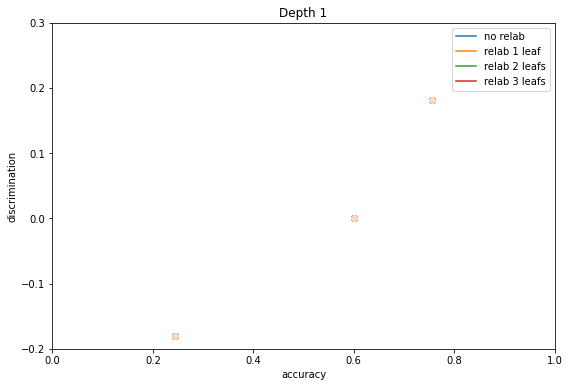

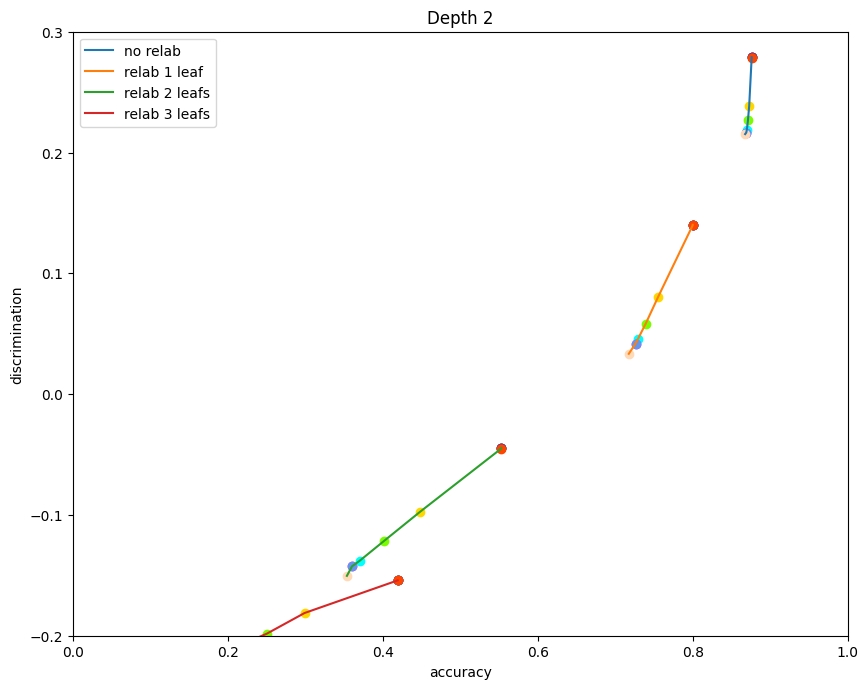

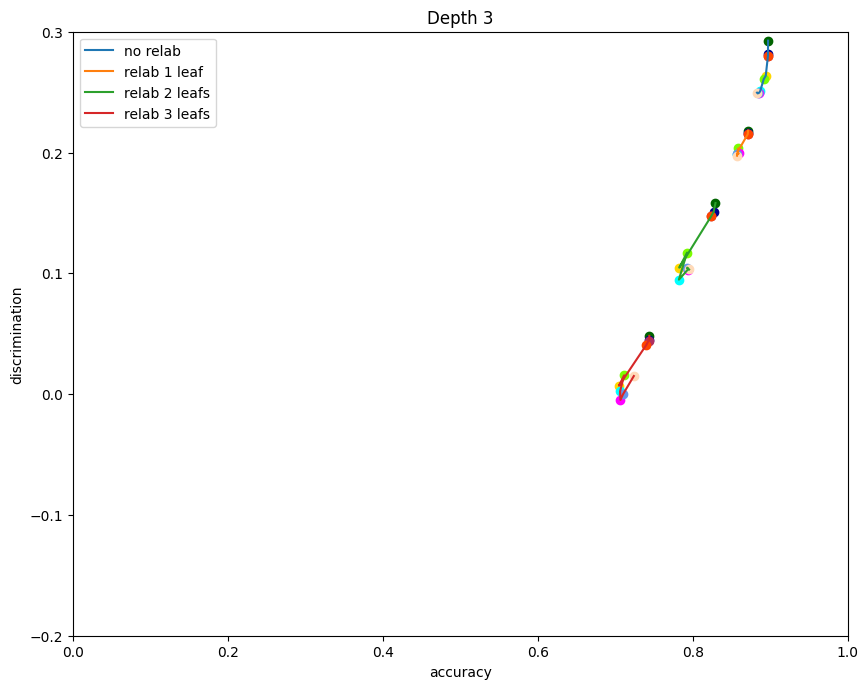

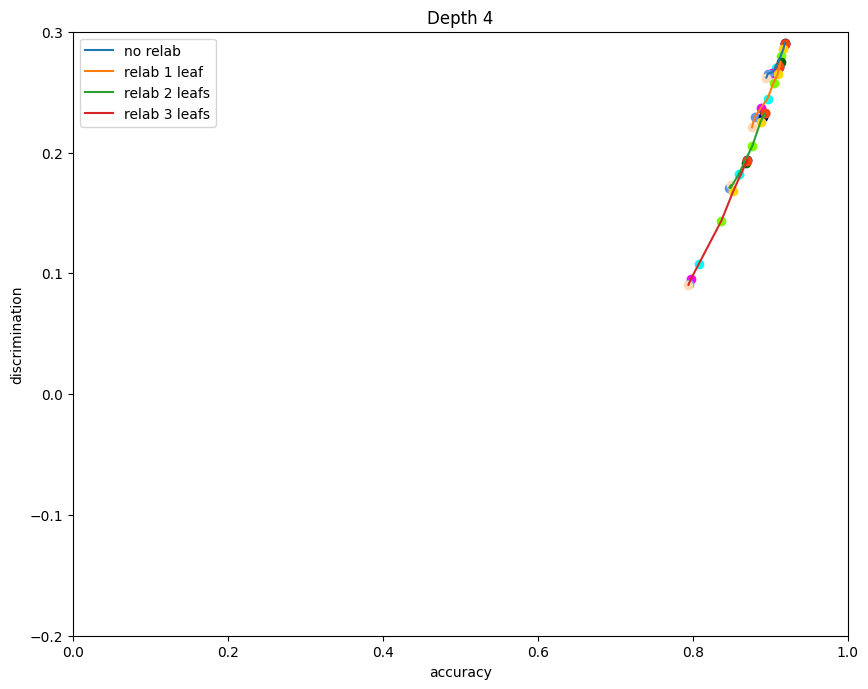

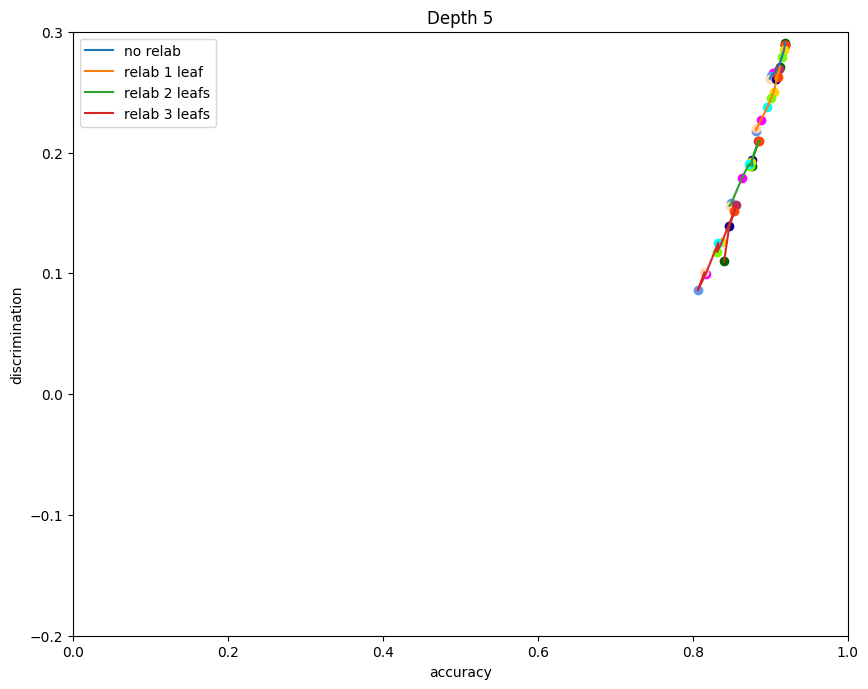

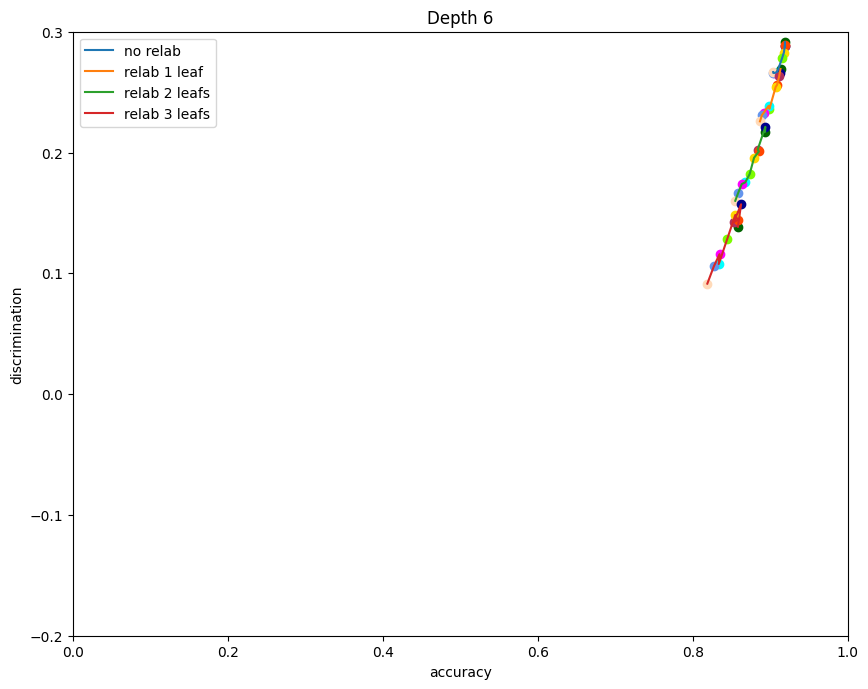

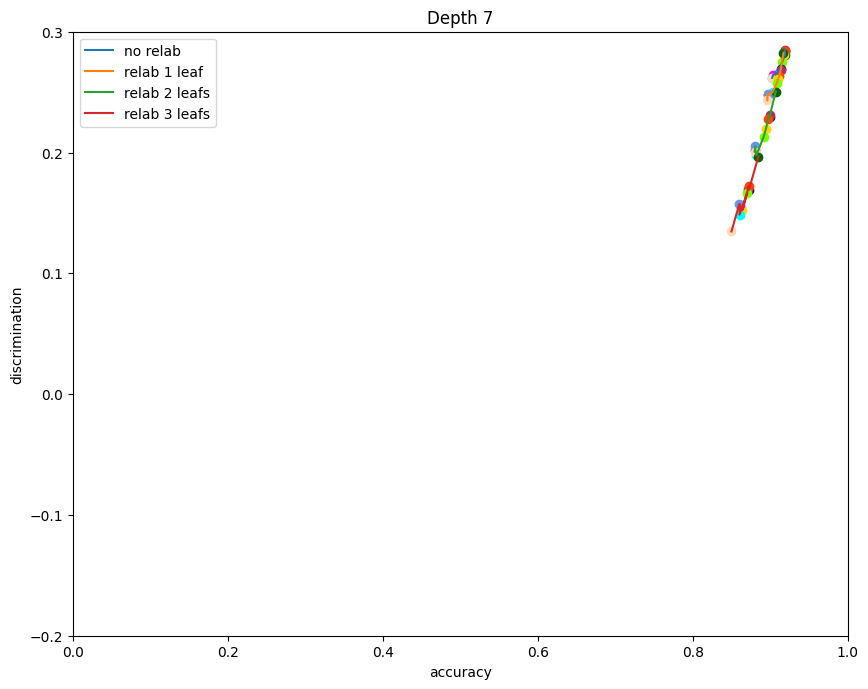

In [14]:
colors = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
legends = ['no relab', 'relab 1 leaf', 'relab 2 leafs', 'relab 3 leafs']
fig, axes = plt.subplots()
for depth in df['depth'].unique():
    index_legends = 0
    for x_axe, y_axe in [('accuracy_train', 'discrimination_train_pred'), ('accuracy_relab_1', 'discrimination_relab_1'), ('accuracy_relab_2', 'discrimination_relab_2'), ('accuracy_relab_3', 'discrimination_relab_3')]:
        index_color = 0
        y_values = list()
        x_values = list()
        for k in df['k'].unique():
            tmp = df.loc[(df["k"] == k) & (df["depth"] == depth)]
            x_values.append(tmp[x_axe].mean())
            y_values.append(tmp[y_axe].mean())

            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors[index_color])
            """
            plt.annotate(k, # this is the text
                         (tmp[x_axe].mean(), tmp[y_axe].mean()), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
            """
            index_color +=1

        plt.plot(x_values, y_values, label=legends[index_legends])
        index_legends +=1
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    plt.ylim(-0.2, 0.3)
    plt.xlim(0, 1)
    plt.legend()

    plt.show()

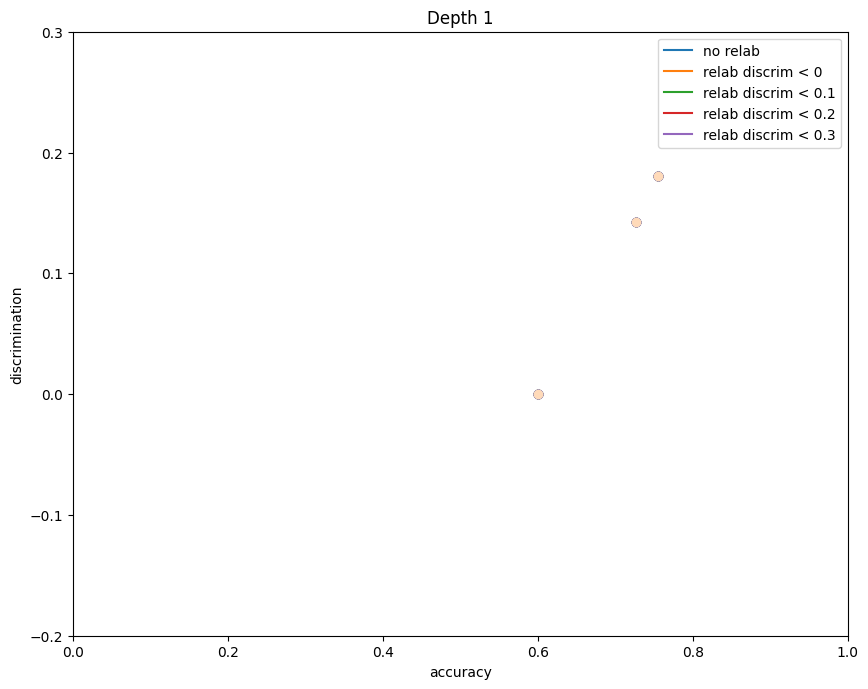

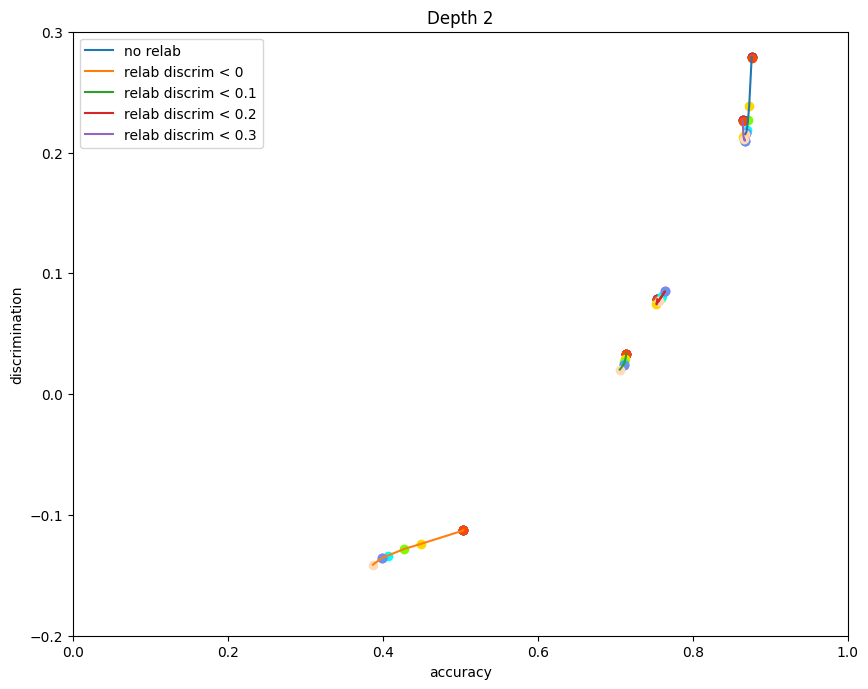

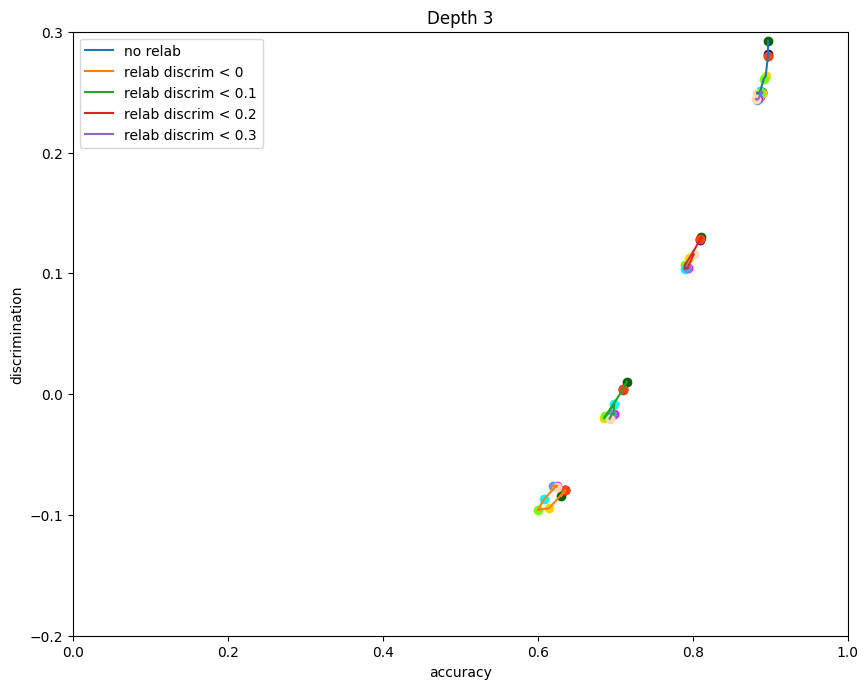

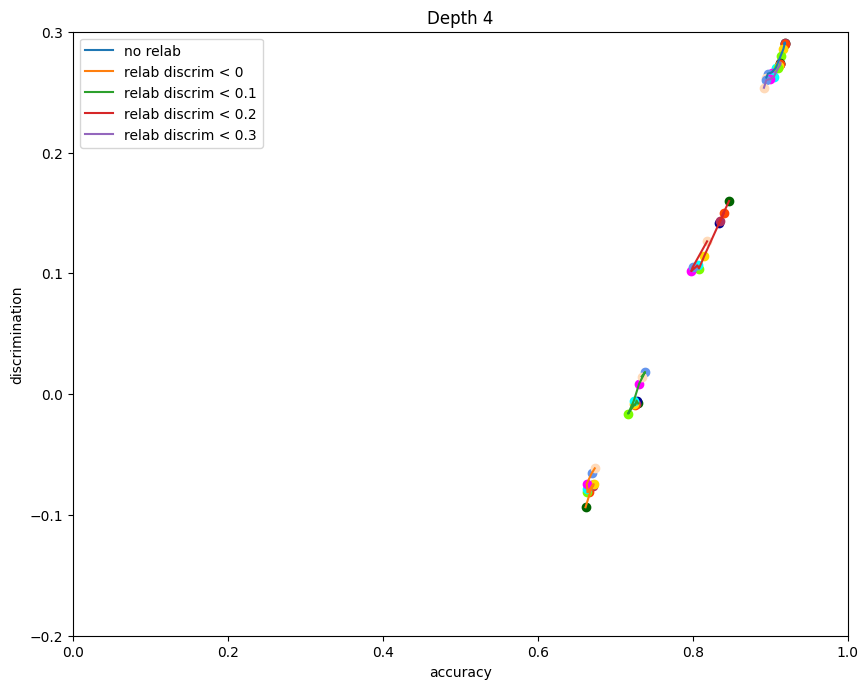

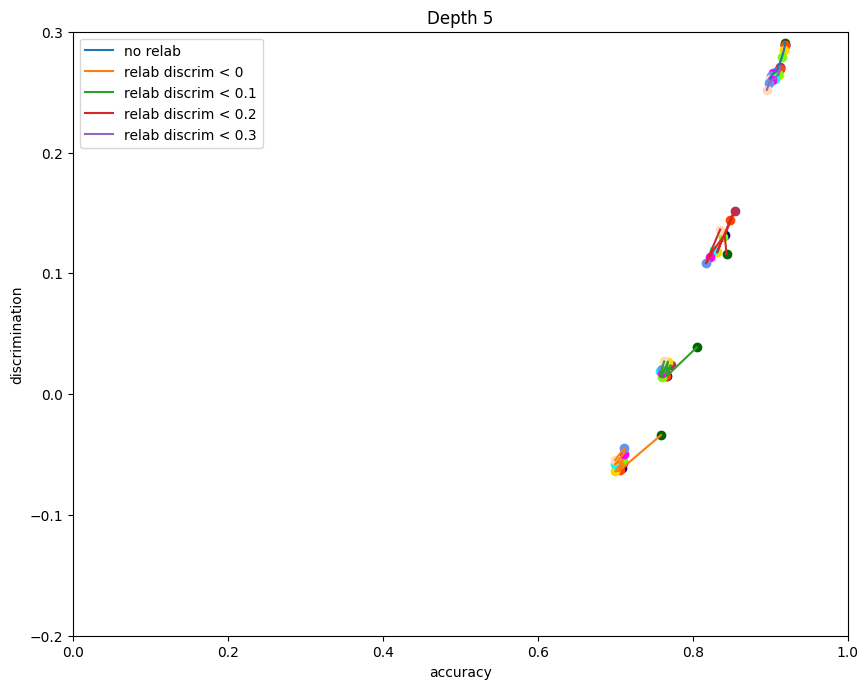

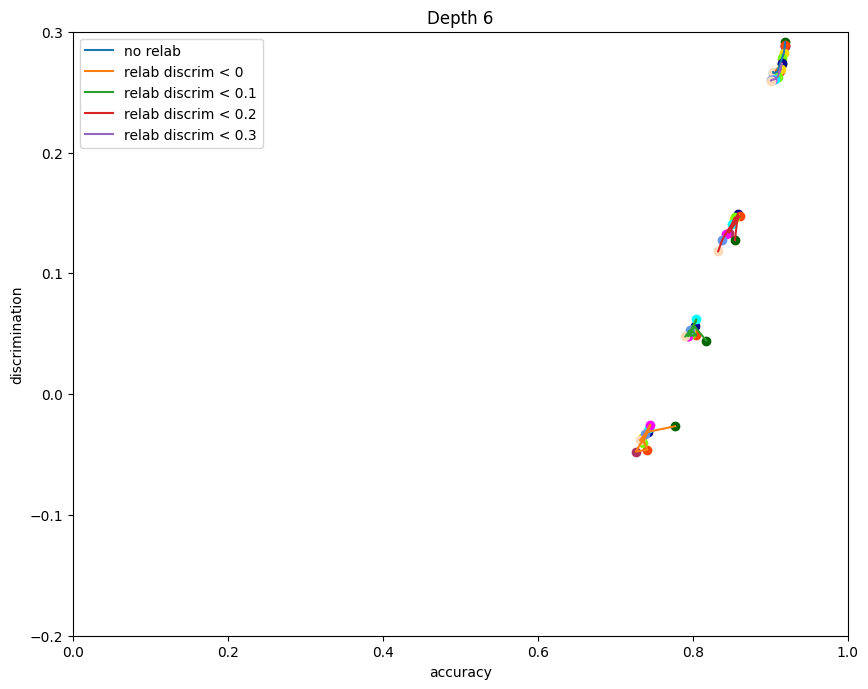

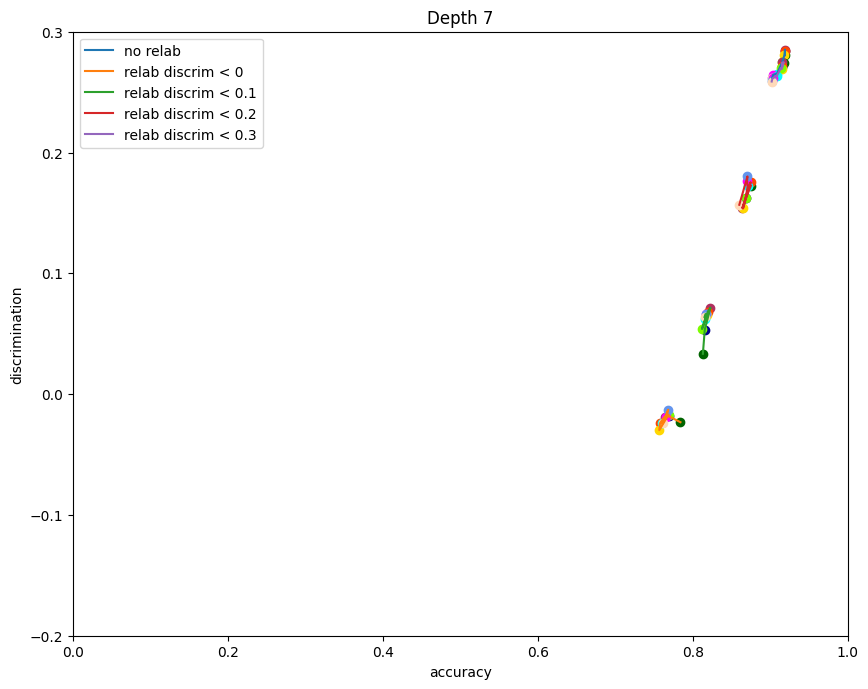

In [15]:
colors = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
legends = ['no relab', 'relab discrim < 0', 'relab discrim < 0.1', 'relab discrim < 0.2', 'relab discrim < 0.3']
fig, axes = plt.subplots()
for depth in df['depth'].unique():
    index_legends = 0
    for x_axe, y_axe in [('accuracy_train', 'discrimination_train_pred'), ('accuracy_relab_0', 'discrimination_relab_0'), ('accuracy_relab_0.1', 'discrimination_relab_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_0.3')]:
        index_color = 0
        y_values = list()
        x_values = list()
        for k in df['k'].unique():
            tmp = df.loc[(df["k"] == k) & (df["depth"] == depth)]
            x_values.append(tmp[x_axe].mean())
            y_values.append(tmp[y_axe].mean())

            plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors[index_color])
            """
            plt.annotate(k, # this is the text
                         (tmp[x_axe].mean(), tmp[y_axe].mean()), # these are the coordinates to position the label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
            """
            index_color +=1

        plt.plot(x_values, y_values, label=legends[index_legends])
        index_legends +=1
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(f'Depth {depth}')
    plt.ylabel('discrimination')
    plt.xlabel('accuracy')
    plt.ylim(-0.2, 0.3)
    plt.xlim(0, 1)
    plt.legend()

    plt.show()

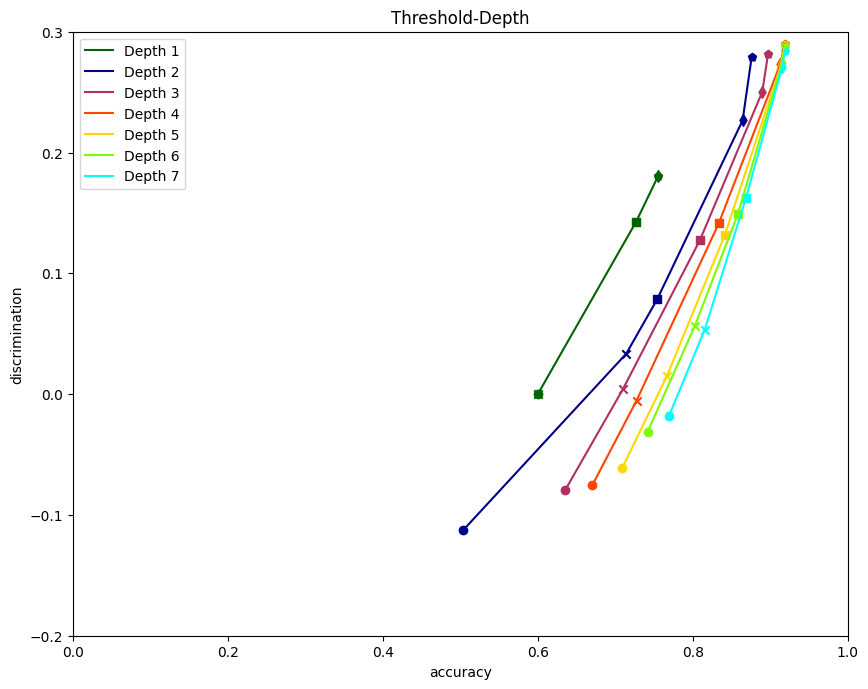

In [16]:
colors = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
legends = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6', 'Depth 7']
markers = ['o', 'x', 's', 'd', 'p', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

index_legend = 0
index_color = 0


fig, axes = plt.subplots()
k=1
for depth in df['depth'].unique():
    y_values = list()
    x_values = list()
    index_marker = 0
    for x_axe, y_axe in [('accuracy_relab_0', 'discrimination_relab_0'), ('accuracy_relab_0.1', 'discrimination_relab_0.1'), ('accuracy_relab_0.2', 'discrimination_relab_0.2'), ('accuracy_relab_0.3', 'discrimination_relab_0.3'), ('accuracy_train', 'discrimination_train_pred')]:

        tmp = df.loc[(df["k"] == k) & (df["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors[index_color], marker=markers[index_marker])
        index_marker +=1

    plt.plot(x_values, y_values, label=legends[index_legend], c=colors[index_color])
    index_color +=1
    index_legend +=1

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title(f'Threshold-Depth')
plt.ylabel('discrimination')
plt.xlabel('accuracy')
plt.ylim(-0.2, 0.3)
plt.xlim(0, 1)
plt.legend()

plt.show()

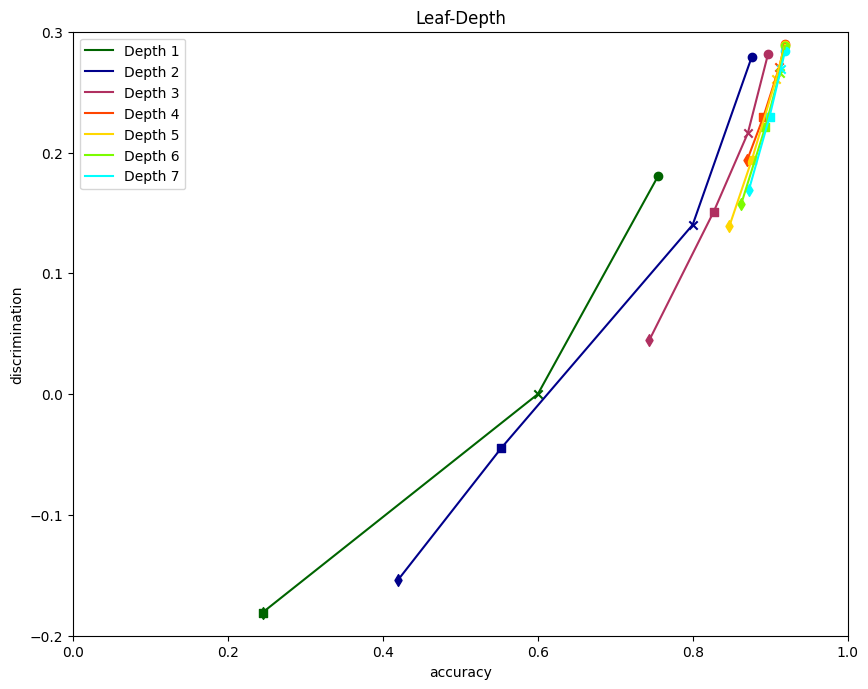

In [17]:
colors = ['#006400', '#00008b', '#b03060', '#ff4500', '#ffd700', '#7cfc00', '#00ffff', '#ff00ff', '#6495ed',
          '#ffdab9']
legends = ['Depth 1', 'Depth 2', 'Depth 3', 'Depth 4', 'Depth 5', 'Depth 6', 'Depth 7']
markers = ['o', 'x', 's', 'd', 'p', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

index_legend = 0
index_color = 0


fig, axes = plt.subplots()
k=1
for depth in df['depth'].unique():
    y_values = list()
    x_values = list()
    index_marker = 0
    for x_axe, y_axe in [('accuracy_train', 'discrimination_train_pred'), ('accuracy_relab_1', 'discrimination_relab_1'), ('accuracy_relab_2', 'discrimination_relab_2'), ('accuracy_relab_3', 'discrimination_relab_3')]:

        tmp = df.loc[(df["k"] == k) & (df["depth"] == depth)]
        x_values.append(tmp[x_axe].mean())
        y_values.append(tmp[y_axe].mean())

        plt.scatter(tmp[x_axe].mean(), tmp[y_axe].mean(), c=colors[index_color], marker=markers[index_marker])
        index_marker +=1

    plt.plot(x_values, y_values, label=legends[index_legend], c=colors[index_color])
    index_color +=1
    index_legend +=1

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title(f'Leaf-Depth')
plt.ylabel('discrimination')
plt.xlabel('accuracy')
plt.ylim(-0.2, 0.3)
plt.xlim(0, 1)
plt.legend()

plt.show()